In [75]:
#All the libraries
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


True

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB

In [9]:
file_name='train-balanced-sarcasm.csv'

In [11]:
train_df = pd.read_csv(file_name)

In [12]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [14]:
train_df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [31]:
train_df[train_df.isnull().any(axis=1)]['comment']

602        NaN
56269      NaN
68590      NaN
135348     NaN
199910     NaN
258718     NaN
284331     NaN
312969     NaN
328775     NaN
331735     NaN
332600     NaN
332631     NaN
362293     NaN
389792     NaN
445204     NaN
499549     NaN
505371     NaN
520619     NaN
524263     NaN
529336     NaN
532823     NaN
569280     NaN
645450     NaN
651242     NaN
661519     NaN
675235     NaN
683899     NaN
747602     NaN
799033     NaN
800812     NaN
813274     NaN
817886     NaN
859333     NaN
875251     NaN
878050     NaN
898863     NaN
905291     NaN
914178     NaN
914615     NaN
918700     NaN
919882     NaN
923678     NaN
936221     NaN
949593     NaN
966886     NaN
967116     NaN
978220     NaN
982492     NaN
992907     NaN
995023     NaN
1001185    NaN
1001891    NaN
1002133    NaN
1009303    NaN
1010599    NaN
Name: comment, dtype: object

In [36]:
train_df.dropna(axis=0,subset=['comment'],inplace=True)

In [37]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [38]:
train_df[train_df.isnull().any(axis=1)]['comment']

Series([], Name: comment, dtype: object)

In [39]:
# Now I can see that no null values are left in columns

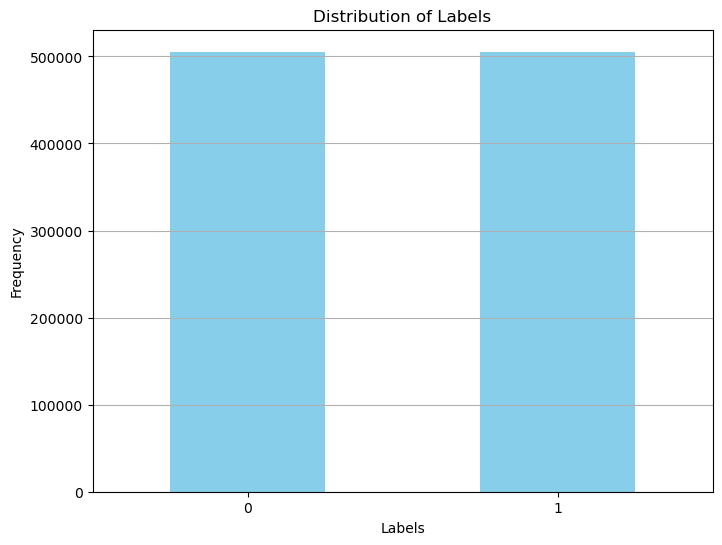

In [44]:
plt.figure(figsize=(8, 6))
train_df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

In [45]:
# Let's me see that the data is pretty distributed evenly

#### Doing analysis of the text length

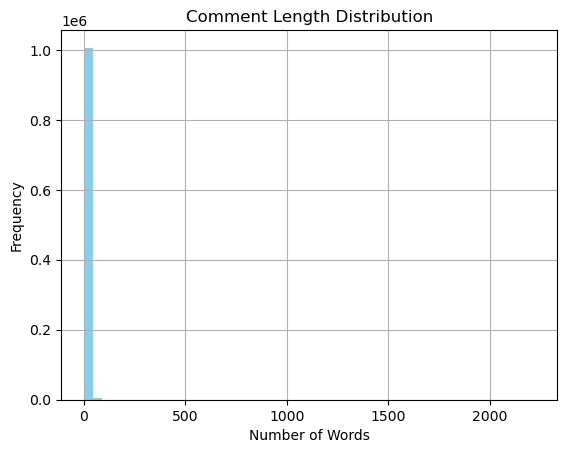

In [46]:
# Adding a new column for comment length
train_df['comment_length'] = train_df['comment'].apply(lambda x: len(x.split()))

# Plotting the comment length distribution
train_df['comment_length'].hist(bins=50, color='skyblue')
plt.title('Comment Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

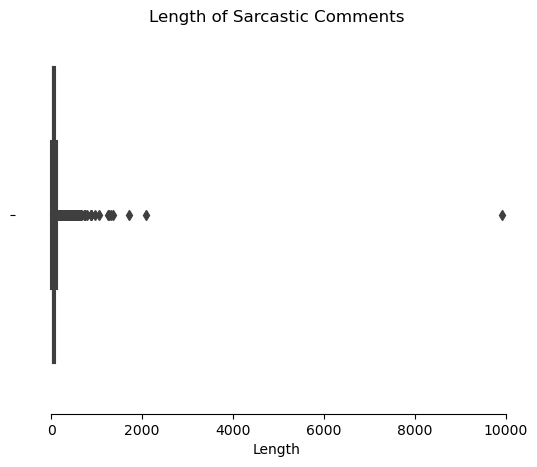

In [51]:
sns.boxplot(x= train_df.loc[train_df['label'] == 1, 'comment'].str.len()).set(title = 'Length of Sarcastic Comments', xlabel = 'Length')
sns.despine(offset=10, trim=True)
plt.show()

#### Score and Upvote/Downvote Analysis

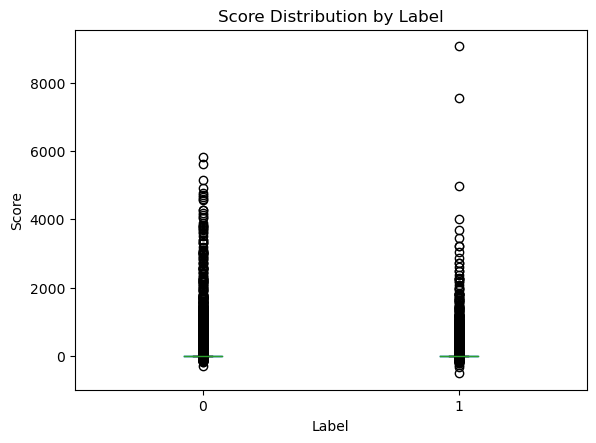

In [52]:
# Boxplot of scores for sarcastic and non-sarcastic comments
train_df.boxplot(column='score', by='label', grid=False)
plt.title('Score Distribution by Label')
plt.suptitle('')
plt.xlabel('Label')
plt.ylabel('Score')
plt.show()


In [53]:
# I see that there is some issue witht the score as I see the dataset with the wrong scores and even negative up and down. Having that in redit doesn't makes sense

### Time based analysis

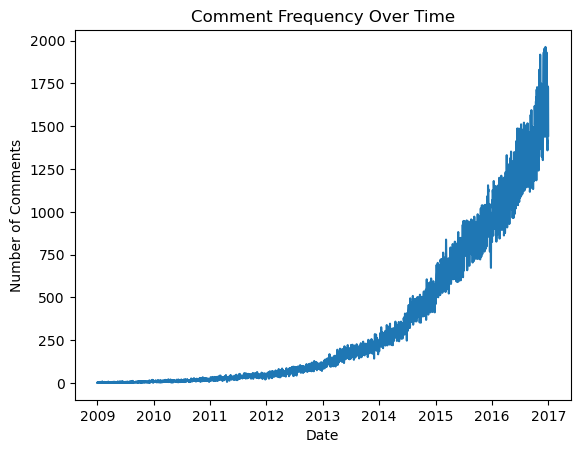

In [54]:
# Convert 'created_utc' to datetime for analysis
train_df['created_utc'] = pd.to_datetime(train_df['created_utc'])

# Plotting comment frequency by date
train_df['created_utc'].dt.date.value_counts().plot(kind='line')
plt.title('Comment Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()


<Axes: xlabel='score', ylabel='label'>

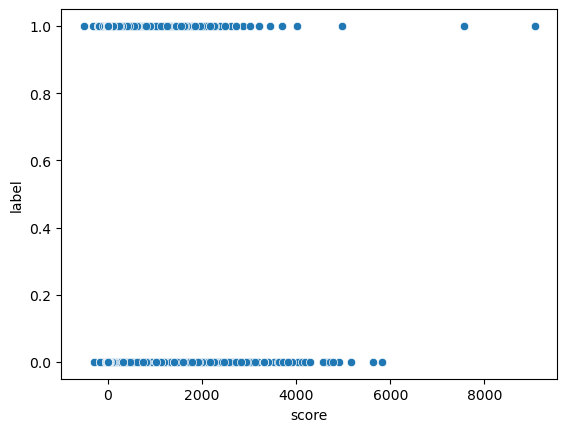

In [62]:
sns.scatterplot(x=train_df['score'],y=train_df['label'])

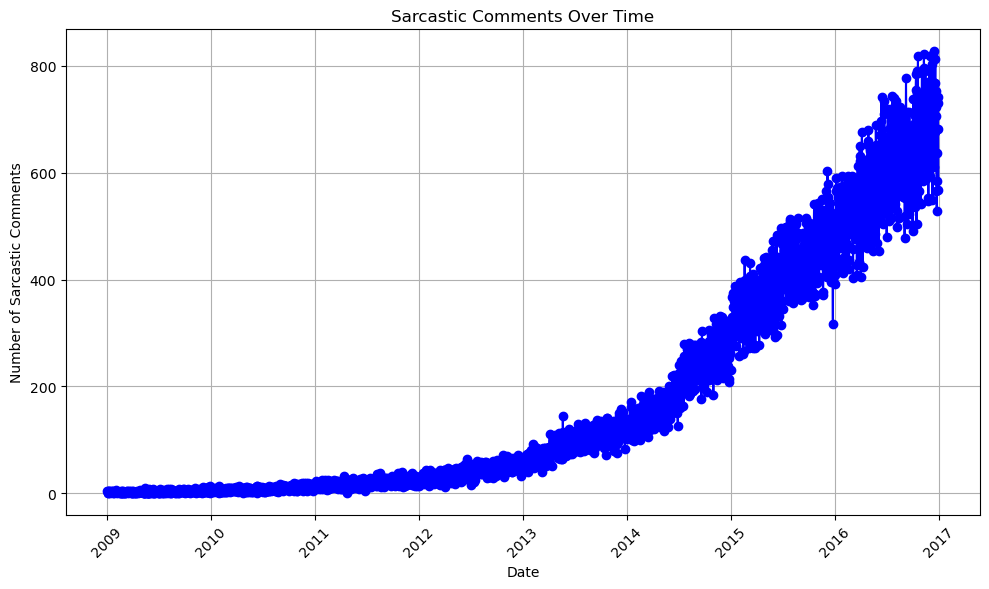

In [59]:
# Step 1: Convert 'created_utc' to datetime
train_df['created_utc'] = pd.to_datetime(train_df['created_utc'])

# Step 2: Filter sarcastic comments (label == 1)
sarcastic_comments = train_df[train_df['label'] == 1]

# Step 3: Group by date and count sarcastic comments
sarcastic_by_date = sarcastic_comments.groupby(sarcastic_comments['created_utc'].dt.date).size()

# Step 4: Plot the graph
plt.figure(figsize=(10, 6))
sarcastic_by_date.plot(kind='line', color='blue', marker='o')
plt.title('Sarcastic Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sarcastic Comments')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

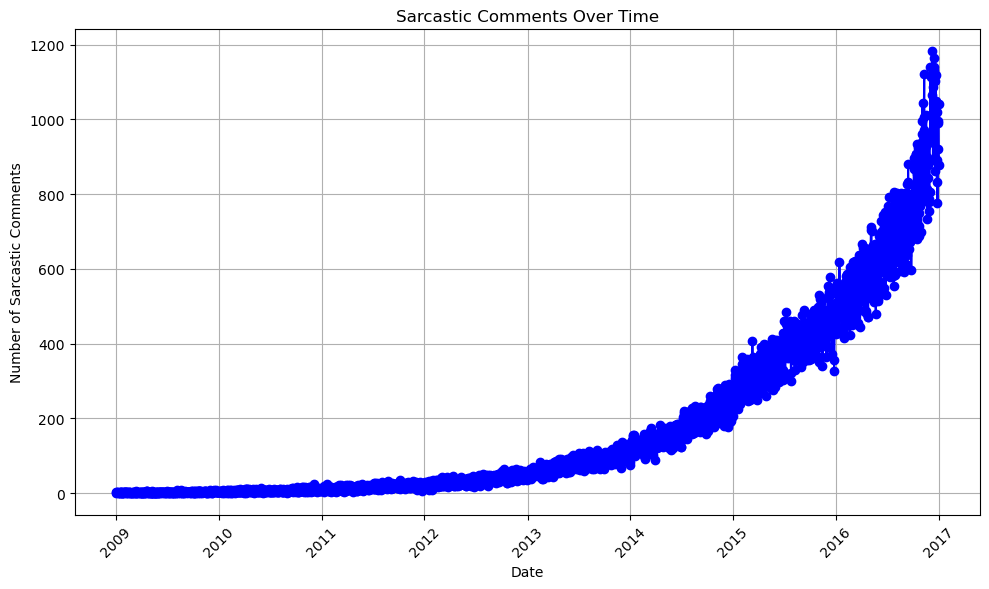

In [60]:
# Step 1: Convert 'created_utc' to datetime
train_df['created_utc'] = pd.to_datetime(train_df['created_utc'])

# Step 2: Filter sarcastic comments (label == 0)
sarcastic_comments = train_df[train_df['label'] == 0]

# Step 3: Group by date and count sarcastic comments
sarcastic_by_date = sarcastic_comments.groupby(sarcastic_comments['created_utc'].dt.date).size()

# Step 4: Plot the graph
plt.figure(figsize=(10, 6))
sarcastic_by_date.plot(kind='line', color='blue', marker='o')
plt.title('Sarcastic Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sarcastic Comments')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [61]:
# The number of comments increases by time and as the dataset is pretty even, I can see that the increase is eaven for the positive and negative label as well

#### Based on above analysis I can say the below things

####
1. The outlier of the line for characters greater than 2000 I'm removing to remove the outliers.
2. The scores for the redit are not giving the proper analysis so will not be used in traning the model
3. The no of comments increased with time for both sarcastic and non sarcastic. Which makes sense as more and mroe people strated using the internet
4. The label is evenly divided

In [115]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(row):
    row = row.lower()
    row = re.sub(r'[^\w\s]', '', row)
    words = row.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words) if words else 'empty'

        

In [116]:
def get_features(X_train,train_data=False):
    X=[]
    for row in X_train:
        row=preprocess(row)
        X.append(row)
    if(train_data==True):
        X_tfidf=tfidf.fit_transform(X)
    else:
        X_tfidf=tfidf.transform(X)
    return X_tfidf
    
        

In [117]:
def train_model(X_train,y_train,model):
    X=get_features(X_train,train_data=True)
    model.fit(X,y_train)
    return model

In [118]:
X_train,X_test,y_train,y_pred=train_test_split(train_df['comment'],train_df['label'],test_size=0.3,train_size=0.7)
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
LR_model=LogisticRegression(random_state=42,max_iter=1000)
model=train_model(X_train,y_train,LR_model)

In [119]:
def model_predict(trained_model,X_test,y_test):
    X=get_features(X_test,train_data=False)
    predictions=trained_model.predict(X)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm=confusion_matrix(y_test,predictions)
    # Print metrics for analysis
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(cm)

In [120]:
model_predict(model,X_test,y_pred)

Accuracy: 0.68
Precision: 0.69
Recall: 0.67
F1 Score: 0.68
[[105796  45918]
 [ 49937 101581]]


In [121]:
#X_train,X_test,y_train,y_pred=train_test_split(train_df['comment'],train_df['label'],test_size=0.3,train_size=0.7)
#tfidf = TfidfVectorizer(stop_words='english')
nb=MultinomialNB()
model=train_model(X_train,y_train,nb)

In [122]:
model_predict(model,X_test,y_pred)

Accuracy: 0.66
Precision: 0.65
Recall: 0.70
F1 Score: 0.68
[[ 94895  56819]
 [ 45176 106342]]
